# Test serialization formats

Find a good format/library for speed, and secondary, storage speed.

In [1]:
import os
import sys
sys.path.append(os.path.abspath("..")) 
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
mpl.style.use("ggplot")
from speclib.loaders import getUserList, loadUser
from speclib.plotting import looseAxesLimits
import json
import ujson
import gzip
import io

In [3]:
userList = getUserList()

In [4]:
t0 = time.time()
# userdata = loadUser(userList[0], dataFilter=("gps",)) 
t1 = time.time()
print(t1 - t0) 

6.937980651855469e-05


In [5]:
# len(userdata['gps']) 

## Save serialized data

In [6]:
# with open('jsongps.json', 'w') as fid:
#     json.dump(gps, fid, check_circular=False) 

In [7]:
# with open("ujsongps.json", 'w') as fid:
#     ujson.dump(gps, fid) 

## Time loading of serialized data

In [8]:
def jsonLoad():
    with open('jsongps.json_org') as fid:
        return json.load(fid) 

In [9]:
def ujsonLoad():
    with open("jsongps.json_org") as fid:
        return ujson.load(fid) 

In [10]:
def buffered_pandasjsonLoad():
    with io.BufferedReader(open("jsongps.json_org", 'br')) as fid:
        return pd.io.json.loads(fid.read()) 

In [11]:
def gzip_jsongpsLoad():
    with gzip.open("jsongps.json.gz") as f:
        return json.loads(f.read().decode("ascii")) 

In [12]:
def gzip_ujsongpsLoad():
    with gzip.open("jsongps.json.gz") as f:
        return ujson.loads(f.read().decode("ascii")) 

In [13]:
def gzip_buffered_jsongpsLoad():
    with io.BufferedReader(gzip.open("jsongps.json.gz")) as f:
        return json.loads(f.read().decode("ascii")) 

In [14]:
def gzip_buffered_ujsongpsLoad():
    with io.BufferedReader(gzip.open("jsongps.json.gz")) as f:
        return ujson.loads(f.read().decode("ascii")) 

In [15]:
def gzip_buffered_pandasjsonLoad():
    with io.BufferedReader(gzip.open("jsongps.json.gz")) as fid:
        return pd.io.json.loads(fid.read()) 

In [16]:
functions = [buffered_pandasjsonLoad, gzip_buffered_jsongpsLoad,
gzip_buffered_pandasjsonLoad, gzip_buffered_ujsongpsLoad, gzip_jsongpsLoad,
gzip_ujsongpsLoad, jsonLoad, ujsonLoad]
functions.sort(key=lambda x: x.__name__.strip("__"))

In [17]:
def timer(func, repeats=10):
    times = np.zeros(repeats+1)
    print("Testing " + func.__name__)
    times[0] = time.time()
    for i in range(1, repeats+1):
        d = func()
        times[i] = time.time()
    return (func.__name__, np.diff(times))

<IPython.core.display.Javascript object>


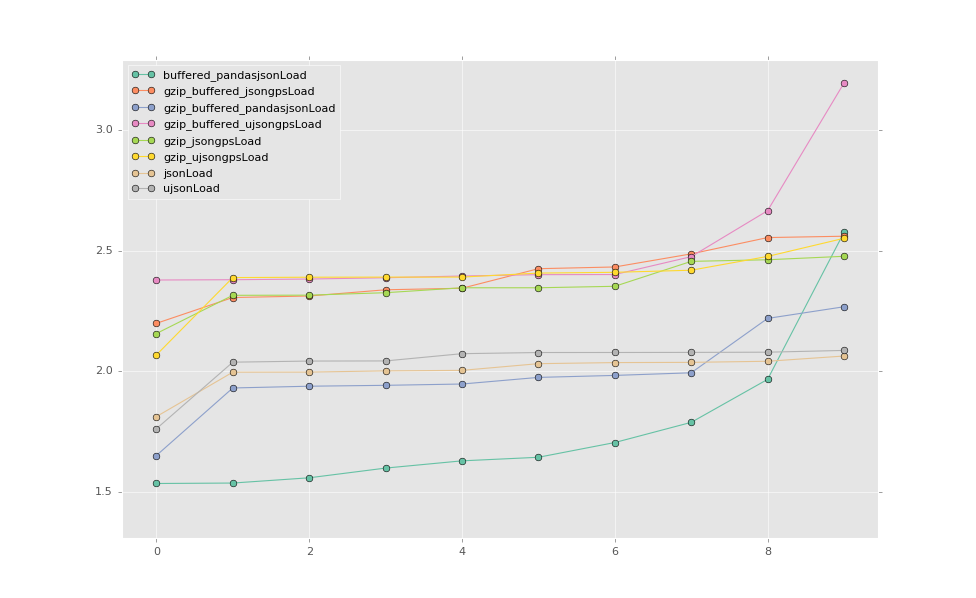

Testing buffered_pandasjsonLoad
Testing gzip_buffered_jsongpsLoad
Testing gzip_buffered_pandasjsonLoad
Testing gzip_buffered_ujsongpsLoad
Testing gzip_jsongpsLoad
Testing gzip_ujsongpsLoad
Testing jsonLoad
Testing ujsonLoad


In [18]:
colors = [(102/255,194/255,165/255),
          (252/255,141/255,98/255),
          (141/255,160/255,203/255),
          (231/255,138/255,195/255),
          (166/255,216/255,84/255),
          (255/255,217/255,47/255),
          (229/255,196/255,148/255),
          (179/255,179/255,179/255)]
fig, ax = plt.subplots()
gen = (timer(fn) for fn in functions)
for color, (funcname, data) in zip(colors, gen):
    data.sort()
    ax.plot(data,  'o-', label=funcname, color=color)
looseAxesLimits(ax)
ax.legend(loc='best', fontsize=10) 